In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
import sys
import time
import tensorflow as tf

%matplotlib inline

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_all,y_train_all),(X_test,y_test) = fashion_mnist.load_data()

#y_train_all = np.array(onehot(y_train_all))
#y_test = np.array(onehot(y_test))



X_valid,X_train = X_train_all[:5000],X_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(X_valid.shape,y_valid.shape)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)
X_valid_scaled = scaler.transform(X_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)
X_test_scaled = scaler.transform(X_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)

In [4]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 32,kernel_size = 3,
                              padding = "same",
                              activation = "relu",
                              input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 32,kernel_size = 3,
                              padding = "same",
                              activation = "relu"))
model.add(keras.layers.MaxPool2D(pool_size = 2))

model.add(keras.layers.Conv2D(filters = 32,kernel_size = 3,
                              padding = "same",
                              activation = "relu"))
model.add(keras.layers.Conv2D(filters = 32,kernel_size = 3,
                              padding = "same",
                              activation = "relu"))
model.add(keras.layers.MaxPool2D(pool_size = 2))

model.add(keras.layers.Conv2D(filters = 32,kernel_size = 3,
                              padding = "same",
                              activation = "relu"))
model.add(keras.layers.Conv2D(filters = 32,kernel_size = 3,
                              padding = "same",
                              activation = "relu"))
model.add(keras.layers.MaxPool2D(pool_size = 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation = "relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(
    loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 32)         

In [7]:
logdir = "./conv_nn_batch_normalizaion_selu"

if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir,"deep_neural_network.h5")

callbacks = [
    tf.keras.callbacks.TensorBoard(logdir),
    tf.keras.callbacks.ModelCheckpoint(output_model_file),
    tf.keras.callbacks.EarlyStopping(min_delta=1e-5,patience=8),
]

history = model.fit(X_train_scaled,y_train,epochs=10,
                    validation_data=(X_valid_scaled,y_valid),
                    callbacks = callbacks)


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 159s 3ms/sample - loss: 0.9122 - accuracy: 0.6662 - val_loss: 0.5075 - val_accuracy: 0.8126
Epoch 2/10
55000/55000 [==============================] - 157s 3ms/sample - loss: 0.4401 - accuracy: 0.8381 - val_loss: 0.4052 - val_accuracy: 0.8478
Epoch 3/10
55000/55000 [==============================] - 159s 3ms/sample - loss: 0.3734 - accuracy: 0.8620 - val_loss: 0.3383 - val_accuracy: 0.8746
Epoch 4/10
55000/55000 [==============================] - 158s 3ms/sample - loss: 0.3368 - accuracy: 0.8747 - val_loss: 0.3616 - val_accuracy: 0.8666
Epoch 5/10
55000/55000 [==============================] - 153s 3ms/sample - loss: 0.3132 - accuracy: 0.8836 - val_loss: 0.2915 - val_accuracy: 0.8958
Epoch 6/10
55000/55000 [==============================] - 149s 3ms/sample - loss: 0.2943 - accuracy: 0.8922 - val_loss: 0.2856 - val_accuracy: 0.8960
Epoch 7/10
55000/55000 [===========================

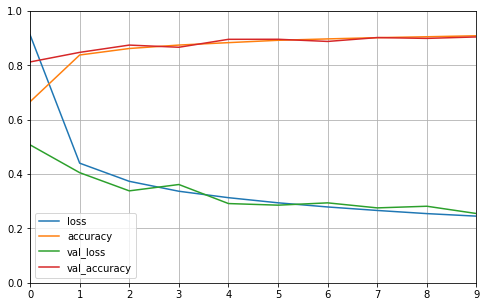

In [8]:
import pandas as pd

def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curve(history)

In [12]:
model.evaluate(X_test_scaled,y_test,verbose = 0)

[0.2765249398112297, 0.8985]